# California Housing Price Prediction - (Project)

# Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 

from sklearn import metrics

# Loading The Dataset

# Read the “housing.csv” file from the folder into the program.

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


# Print first few rows of this data.

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.shape

(20640, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

We can see that only total_bedrooms have non-null values

# Fill the missing values with the mean of the respective column.

In [9]:
print("Total_bedrooms column Mean is  "+str(data["total_bedrooms"].mean())+"\n")
print(data["total_bedrooms"].describe())

Total_bedrooms column Mean is  537.8705525375618

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [10]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

In [11]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# Encoding Categorical Data

All the data are numerical values except ocean_proximity, which is categorical feature.

In [12]:
labelEncoder = LabelEncoder()
print(data["ocean_proximity"].value_counts())
data["ocean_proximity"] = labelEncoder.fit_transform(data["ocean_proximity"])
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

As ocean_proximity is a categorical feature, we interpret the count of each category. 
We can see that inland housing is the highest and island housing is the lowest. 
Which makes sense, as most of the people live in inland areas and only the wealthy lives on islands.

In [13]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


C:\Users\india\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\india\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\india\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

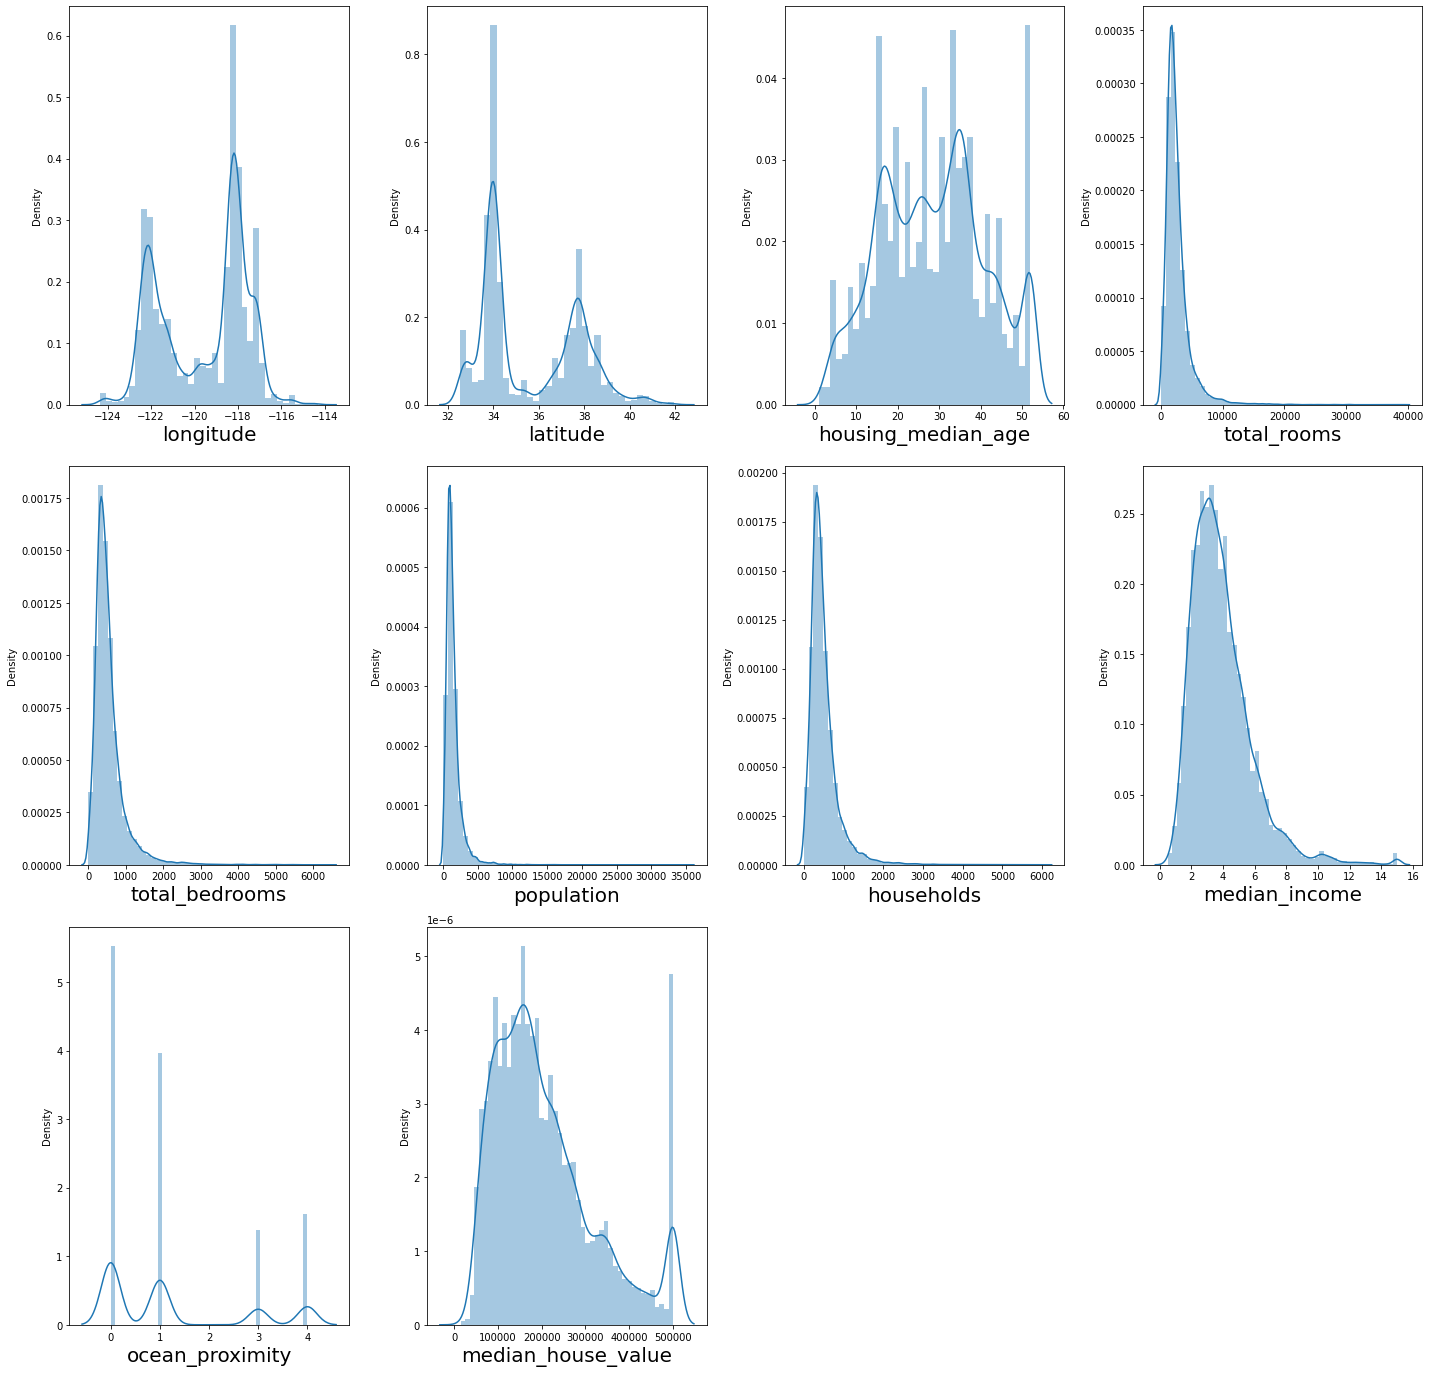

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column]) #plotting 
        plt.xlabel(column,fontsize=20) #label 
        
    plotnumber+=1
plt.tight_layout()

In [15]:
y = data['median_house_value']  
X =data.drop(columns = ['median_house_value'])

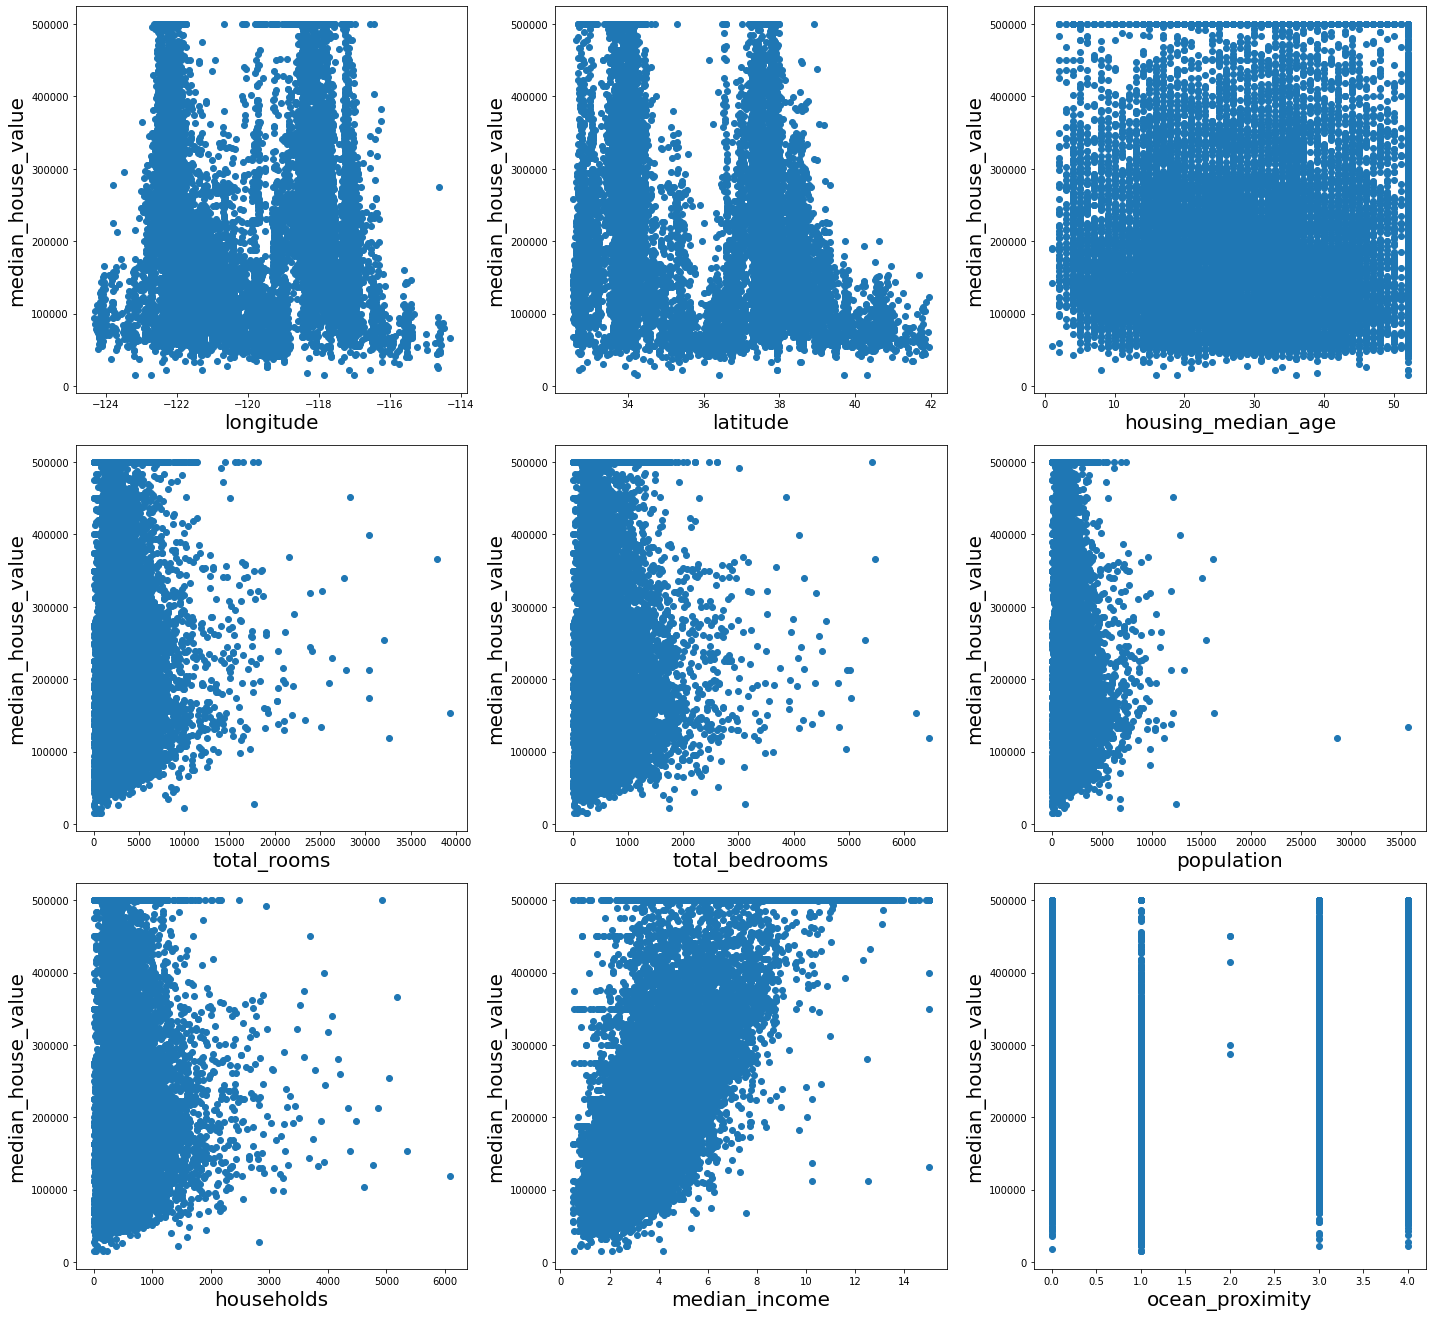

In [16]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('median_house_value',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [17]:
data_ind = data.drop("median_house_value",axis=1)
print(data_ind.head())
data_dep = data["median_house_value"]
print("Medain Housing Values")
print(data_dep.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity  
0         322         126         8.3252                3  
1        2401        1138         8.3014                3  
2         496         177         7.2574                3  
3         558         219         5.6431                3  
4         565         259         3.8462                3  
Medain Housing Values
0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64


In [18]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform

In [19]:
X_scaled

<bound method TransformerMixin.fit_transform of StandardScaler()>

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)

In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [22]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [23]:
regression.score(x_train,y_train)

0.6309640094327986

In [24]:
regression.score(x_test,y_test)

0.6487252913354011

In [25]:
predy=regression.predict(x_test)

In [26]:
r_squared=r2_score(y_test, predy)
r_squared

0.6487252913354011

# Standardize the data

In [28]:
independent_scaler = StandardScaler()
x_train = independent_scaler.fit_transform(x_train)
x_test = independent_scaler.transform(x_test)
print(x_train[0:5,:])
print("test data")
print(x_test[0:5,:])

[[-1.33034056  0.85090365  0.58066339  0.94901212  0.58459866  0.74292674
   0.90914921  1.18916529  1.99639433]
 [ 0.69485827 -0.81190093  1.13696669 -0.50233978 -0.42690985  0.08089322
  -0.31891918 -0.65353095 -0.82191621]
 [-0.82029048  1.29119557 -1.16771842  0.01471871 -0.22651665 -0.12527024
  -0.19846898  0.4426101  -0.11733858]
 [ 0.6248514  -0.8259528   0.10383199 -0.35283443 -0.21935975 -0.46117449
  -0.1644287  -0.37990737 -0.82191621]
 [-1.21032878  0.8883753   0.02436009  0.69462303  0.49633023  0.53765192
   0.65777487  0.68839855 -0.82191621]]
test data
[[ 0.35482489 -0.68543411 -0.61141511  1.39752816  1.98735102  1.57291239
   2.1215067  -0.21146234 -0.82191621]
 [ 0.81487006 -0.83063676  0.50119149 -0.35375446 -0.36488338 -0.2692292
  -0.30582677  0.32547945 -0.82191621]
 [ 1.50493781 -0.88216028 -0.29352751 -0.00322193  0.02636047 -0.74376061
  -0.40532911 -0.38739736 -0.11733858]
 [-1.4203494   1.00547421  1.85221379  0.38365191  1.15715064  0.77136308
   1.2993031

# Perform Linear Regression

# Perform linear regression on training data.

In [30]:
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data 
linearRegModel.fit(x_train,y_train)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is 207049.02493540052
coefficients  is [-85938.49966338 -91078.26107371  14005.0432211  -14655.90381408
  38885.16424126 -44102.93474253  24103.77934838  75029.98492825
   -907.28215851]


In [32]:
y_pred = linearRegModel.predict(x_test)

In [33]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

5160
5160
[253863.56137588 240357.16106451 149096.0418004  247134.83790778
 265936.72628222]
20413    212800
10186    185200
12356    301600
15644    225000
3450     235600
Name: median_house_value, dtype: int64


# Predict output for test dataset using the fitted model.

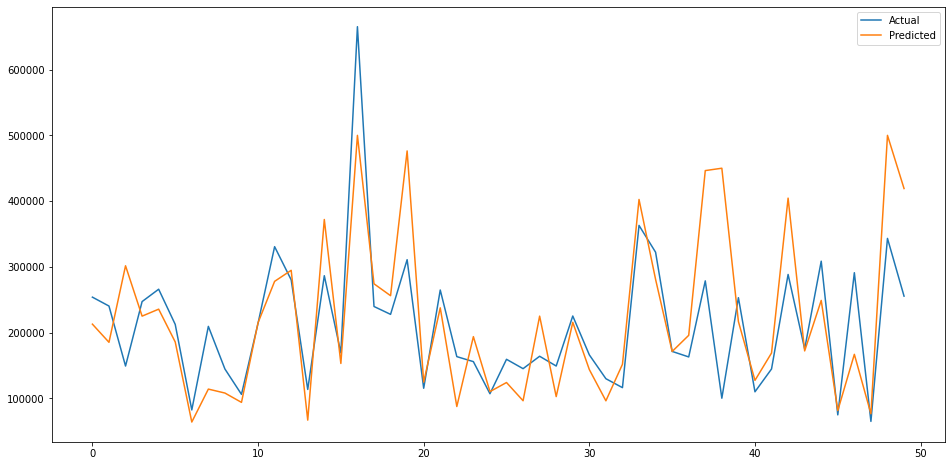

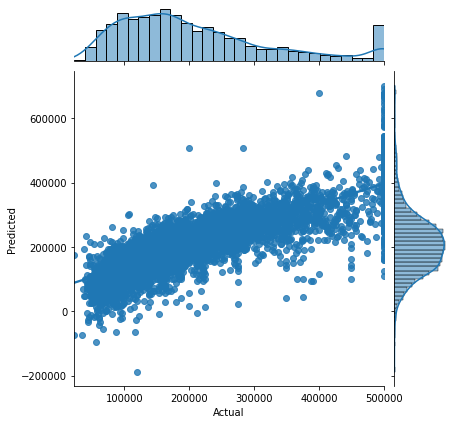

In [34]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

# Print root mean squared error(RMSE) from Linear Regression.

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [36]:
mean_squared_error(y_test,regression.predict(x_test))

4698087806.80694